Copyright (c) 2019 OERCompBiomed (UiB)

# Scikit-learn

__[*scikit-learn*](https://en.wikipedia.org/wiki/Scikit-learn)__ is the premier free software machine learning library for the Python programming language and is built on top of [SciPy](https://scipy.org) (and [NumPy](https://www.numpy.org)). <br>
The scikit-learn library is accompanied with an **extremely comprehensive and well written [documentation](https://scikit-learn.org/stable/documentation.html)** including [User Guide](https://scikit-learn.org/stable/user_guide.html), [Tutorials](https://scikit-learn.org/stable/tutorial/index.html), [Glossary](https://scikit-learn.org/stable/glossary.html), and a lot of [Examples](https://scikit-learn.org/stable/auto_examples/index.html).

The scikit-learn modules are conventionally given the name `sklearn` as a stem for the dot notation, e.g.<br>

`from sklearn.model_selection import` [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)<br>
`from sklearn.neighbors import KNeighborsClassifier`<br>
`from sklearn.preprocessing import StandardScaler`<br>
`from sklearn.datasets import make_moons, make_circles, make_classification`<br>

Scikit-learn also provide some small-sample, biomedically relevant "toy datasets" that are useful for experimentations (however, often too small to be representative of real world machine learning tasks), e.g.
the `iris dataset` (for classification), the `diabetes dataset` (for regression), the `breast cancer wisconsin dataset` (classification), and the `linnerud dataset` (for multivariate regression).

The `sklearn.datasets` package also features helpers to fetch larger datasets commonly used by the machine learning community to benchmark algorithms on data that comes from the ‘real world’, and also functionality to generate synthetic data.

**Here we start with a small end-to-end project**

When you are applying machine learning to your own datasets, you are working on a project that 
may not be linear, but will have a number of well known components:

 1. Define Problem
 2. Prepare Data
 3. Evaluate Algorithms
 4. Improve Results
 5. Present Results

**You are encouraged to experiment with all our code!**

NOTE: The original notebook on Github might change over the time, and we recommend that you make a copy of our notebooks before you are editing them. In this respect you might adopt the naming convention my_<'name_of_notebook'>.ipynb, e.g. my_1.3-scikit-learn-basics.ipynb

### Essential Libraries and Tools

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#### Versions:

In [4]:
print("NumPy version:", np.__version__)
print("pandas version:", pd.__version__)

import sys
print("Python version:", sys.version)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

NumPy version: 1.16.2
pandas version: 0.24.2
Python version: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
matplotlib version: 3.0.3
SciPy version: 1.2.1
IPython version: 7.4.0
scikit-learn version: 0.20.3


## Classifying Iris Species

(modified from the book / [code](https://github.com/amueller/introduction_to_ml_with_python) by Andreas Müller: _Introduction to Machine Learning with Python_, 2016  - see [O'Reilly website](http://shop.oreilly.com/product/0636920030515.do), and Jason Brownlee's https://machinelearningmastery.com/machine-learning-in-python-step-by-step)

We are going to use the [iris flowers dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). This dataset is famous because it is highly used as the "hello world" dataset in machine learning and statistics, it is so well understood, and have the following characteristics:

 - Attributes are numeric so you have to figure out how to load and handle numerical data
 - It is a classification problem, allowing you to practice with simple types of supervised learning algorithms
 - It is a [multi-class classification](https://en.wikipedia.org/wiki/Multiclass_classification) problem that may require some specialized handling
 - It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and on a screen, or on one page of paper)
 - All of the numeric attributes are in the same units and the same scale, not requiring any special [scaling](https://scikit-learn.org/stable/modules/preprocessing.html) or transforms to get started

The dataset contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters. The fifth column is the species of the flower observed. All observed flowers belong to one of three species.

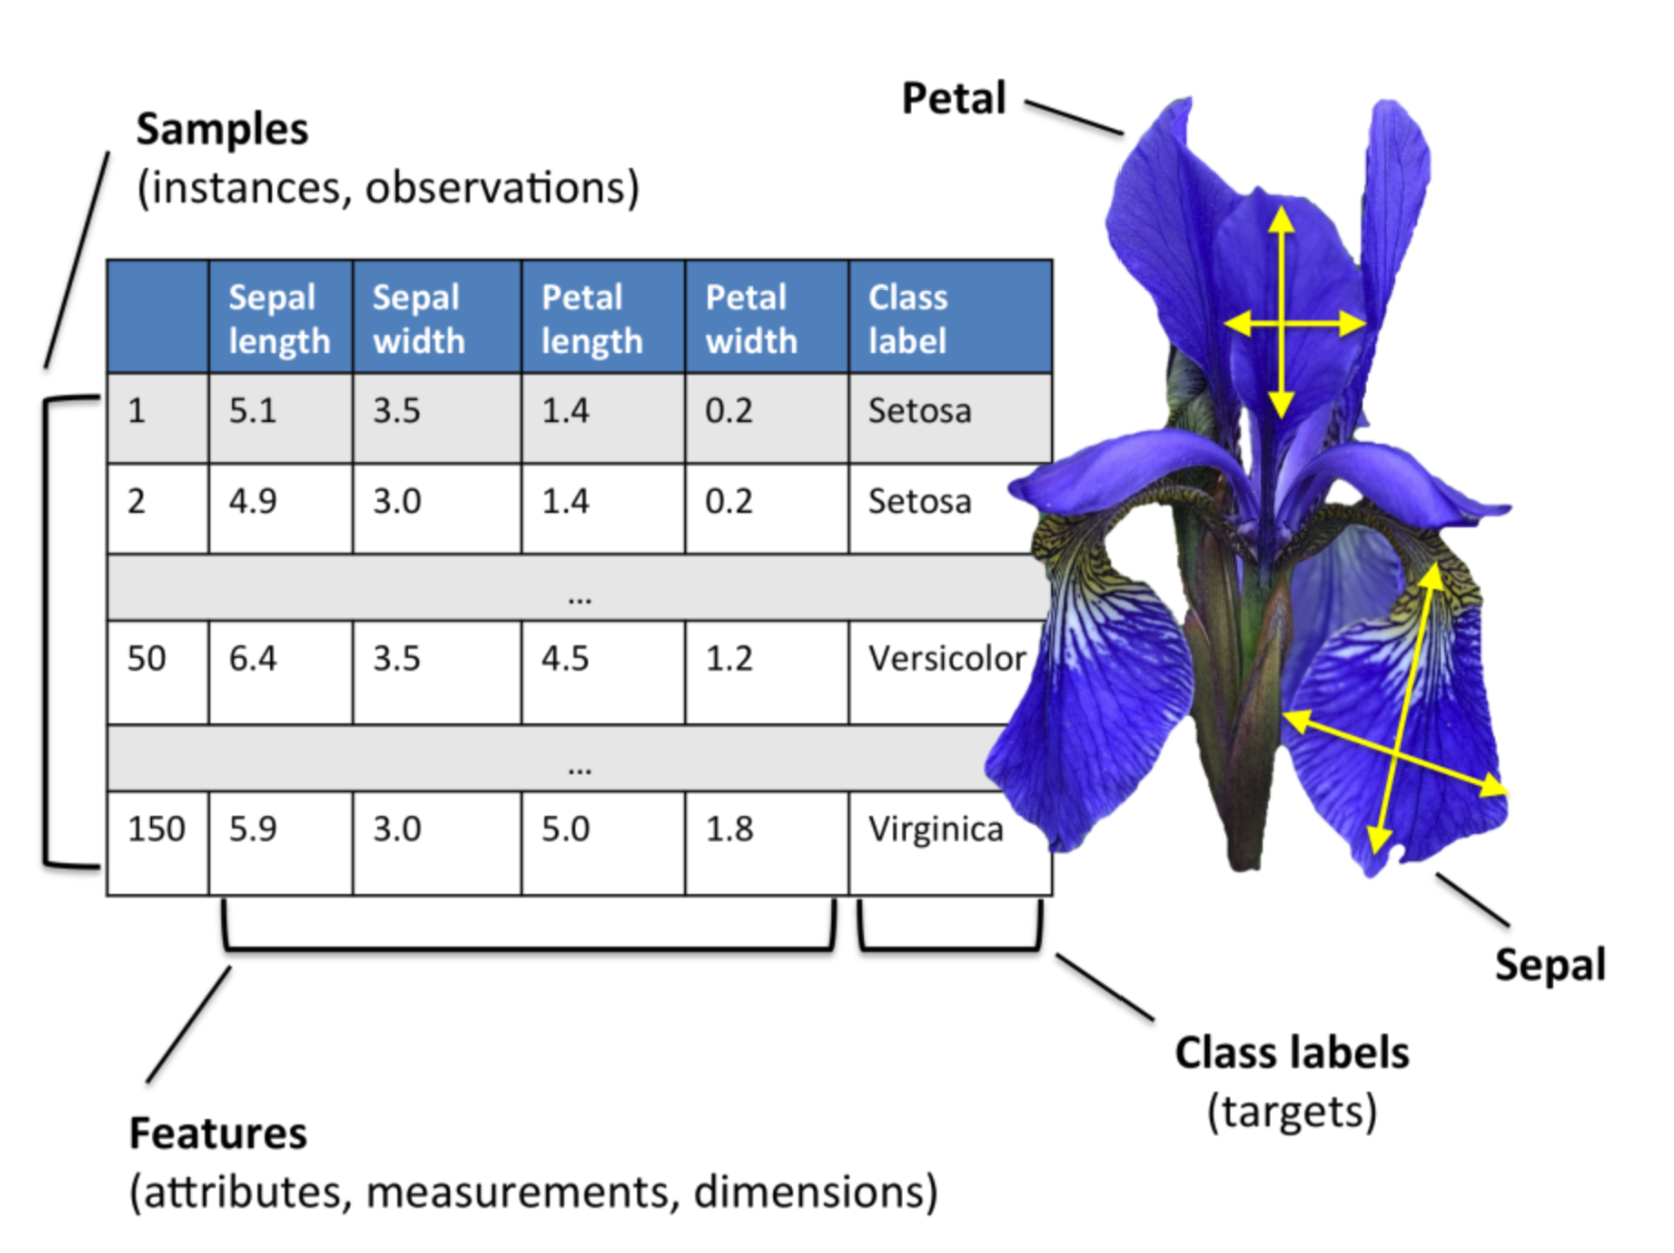

In [5]:
from IPython.display import Image
Image(filename='../assets/iris_petal_sepal.png', width=500)

### Load the data

In [6]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

**We could also load the data directly from the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/iris)**, i.e.

```python
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris_UCI = pd.read_csv(url, names=names)
iris_UCI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
```

### Summarize the data

In this step we will take a look at the data in different ways:

 - Description of the dataset
 - Dimensions of the dataset
 - Peek at the data itself
 - Statistical summary of all attributes (features)
 - Breakdown of the data by the class (target) variable

In [7]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
print(iris_dataset['DESCR'][:500] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                

...


In [9]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [10]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [12]:
# Dimensions of the dataset
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [13]:
# Peek at the data itself
print("First ten rows of data:\n", iris_dataset['data'][:10])

First ten rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [14]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [15]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [16]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Split data into a [Training set and a Test set](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

**75% for training and 25% for testing (by default)** 

Fix a `random_state` for reproducibility: `train_test_split` splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying random_state, you will get a different result. If you seed your random number generator with a fixed number (say 42, or 0), your split will be always the same. 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=42)

In [18]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [19]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


### Explore the (training) data

In [20]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
train_X_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

In [21]:
train_X_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,3.6,1.4,0.2
1,5.2,4.1,1.5,0.1
2,5.8,2.7,5.1,1.9
3,6.0,3.4,4.5,1.6
4,6.7,3.1,4.7,1.5


**Statistical summary** including the count, mean, the min and max values as well as some percentiles

In [22]:
train_X_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,112.000000,112.000000,112.000000,112.000000
mean,5.830357,3.040179,3.807143,1.214286
std,0.819123,0.437120,1.735310,0.747953
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.200000,6.700000,2.500000


We can see that all of the numerical values have the same scale (centimeters) and similar ranges between 0.1 and 7.7 centimeters.

**Class distribution**

In [23]:
y_train

array([0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 2])

In [24]:
print('0 , 2:', iris_dataset['target_names'][0], ',', iris_dataset['target_names'][2])

0 , 2: setosa , virginica


In [25]:
train_y_df = pd.DataFrame(y_train, columns=['class'])
for i in range(len(iris_dataset['target_names'])):
    train_y_df.replace(i,iris_dataset['target_names'][i], inplace=True)
train_y_df.head()

,class
0,setosa
1,setosa
2,virginica
3,versicolor
4,versicolor


In [26]:
train_Xy_df = pd.concat([train_X_df, train_y_df], axis=1)
train_Xy_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.0,3.6,1.4,0.2,setosa
1,5.2,4.1,1.5,0.1,setosa
2,5.8,2.7,5.1,1.9,virginica
3,6.0,3.4,4.5,1.6,versicolor
4,6.7,3.1,4.7,1.5,versicolor


In [27]:
print(train_Xy_df.groupby('class').size())

class
setosa        35
versicolor    39
virginica     38
dtype: int64


### Data visualization

**Univariate plots**

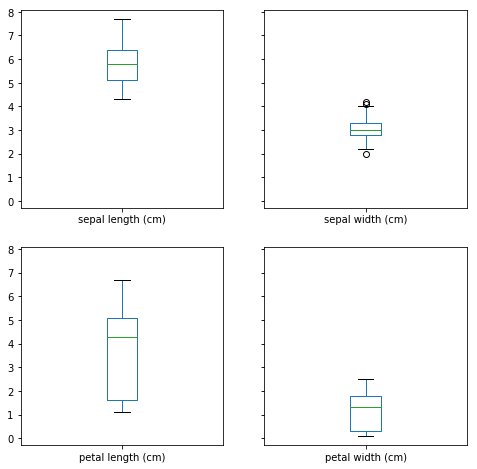

In [28]:
# Box and whisker plots
train_Xy_df.plot(kind='box', 
                 subplots=True, 
                 figsize=(8, 8),
                 layout=(2,2), sharex=False, sharey=True)
plt.show()

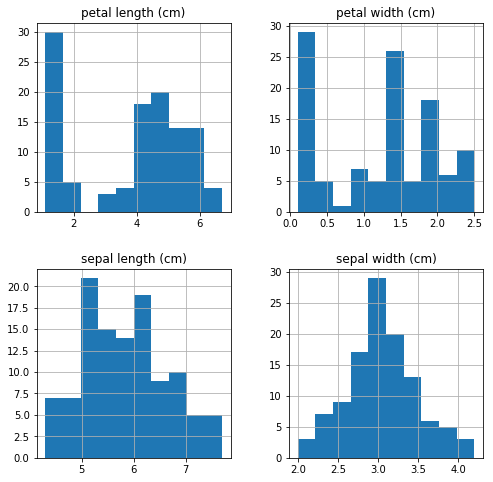

In [29]:
# Histograms
train_Xy_df.hist(figsize=(8, 8))
plt.show()

It looks like perhaps `sepal length` and `sepal width` have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.

**Multivariate Plots**

In seaborn, the `hue` parameter determines which column in the data frame should be used for colour encoding

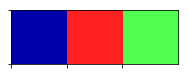

In [30]:
mycol = ['#0000aa', '#ff2020', '#50ff50'] # 0, 2, 1: setosa virginica versicolor 
#sns.palplot(sns.color_palette('bright', n_colors=3, desat=1))
sns.palplot(sns.color_palette(mycol))

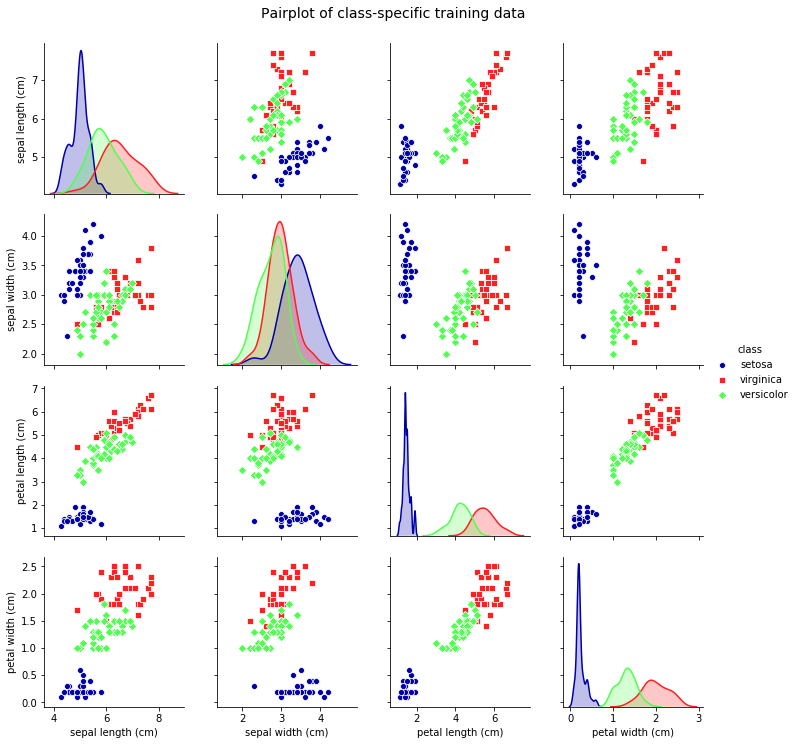

In [31]:
# Seaborn pairplot
g = sns.pairplot(train_Xy_df, diag_kind='kde', hue='class', markers=["o", "s", "D"], palette=mycol)
g.fig.suptitle('Pairplot of class-specific training data', y=1.03, size=14) # y= some height>1
plt.show(g)

# Supervised classification

## Plot different SVM classifiers for the iris dataset

(modified from the scikit-learn documentation / [SVM examples](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html))


Comparison of different SVM classifiers on a 2D projection of the iris
dataset. For simple visualization we only consider the first 2 features of the iris dataset:

- Sepal length
- Sepal width

This example shows how to plot the decision surface for four SVM classifiers
with different kernels.

The linear models ``LinearSVC()`` and ``SVC(kernel='linear')`` yield slightly
different decision boundaries. This can be a consequence of the following
differences:

- ``LinearSVC`` minimizes the squared hinge loss while ``SVC`` minimizes the
  regular hinge loss.

- ``LinearSVC`` uses the One-vs-All (also known as One-vs-Rest) multiclass
  reduction while ``SVC`` uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes)
while the non-linear kernel models (polynomial or Gaussian RBF) have more
flexible non-linear decision boundaries with shapes that depend on the kind of
kernel and its parameters.


<blockquote style="border: 0px solid #666; padding: 10px; background-color: #ccc;"> <b>NOTE:</b> While plotting the decision function of classifiers for toy 2D datasets can help get an intuitive understanding of their respective expressive power, be aware that those intuitions don't always generalize to more realistic high-dimensional problems</blockquote>

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [33]:
# From previous loading of data:
# iris_dataset = datasets.load_iris()

# Take the first two features
X = iris_dataset.data[:, :2]
y = iris_dataset.target

In [34]:
# We split the two-features dataset into test and train as before
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, random_state=42)

In [35]:
# Check that the indices of test and train data are selected as previously (using a fixed trandom_state)
print("X2_train shape:", X2_train.shape)
print("y2_train shape:", y2_train.shape)
print('np.array_equal(X2_train[:, :2], X2_train) =', np.array_equal(X2_train[:, :2], X2_train))
print('np.array_equal(y2_train, y_train) =', np.array_equal(y2_train, y_train))

X2_train shape: (112, 2)
y2_train shape: (112,)
np.array_equal(X2_train[:, :2], X2_train) = True
np.array_equal(y2_train, y_train) = True


In [36]:
# Helper function for plotting a meshgrid
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [37]:
# Helper function for plotting contours of decision boundaries
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [38]:
# We create an instance of SVM and fit the data. 
# (we do not scale our data since we want to plot the support vectors)
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models_fit = (clf.fit(X2_train, y2_train) for clf in models)

In [39]:
models

(SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='linear', max_iter=-1, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=10000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))

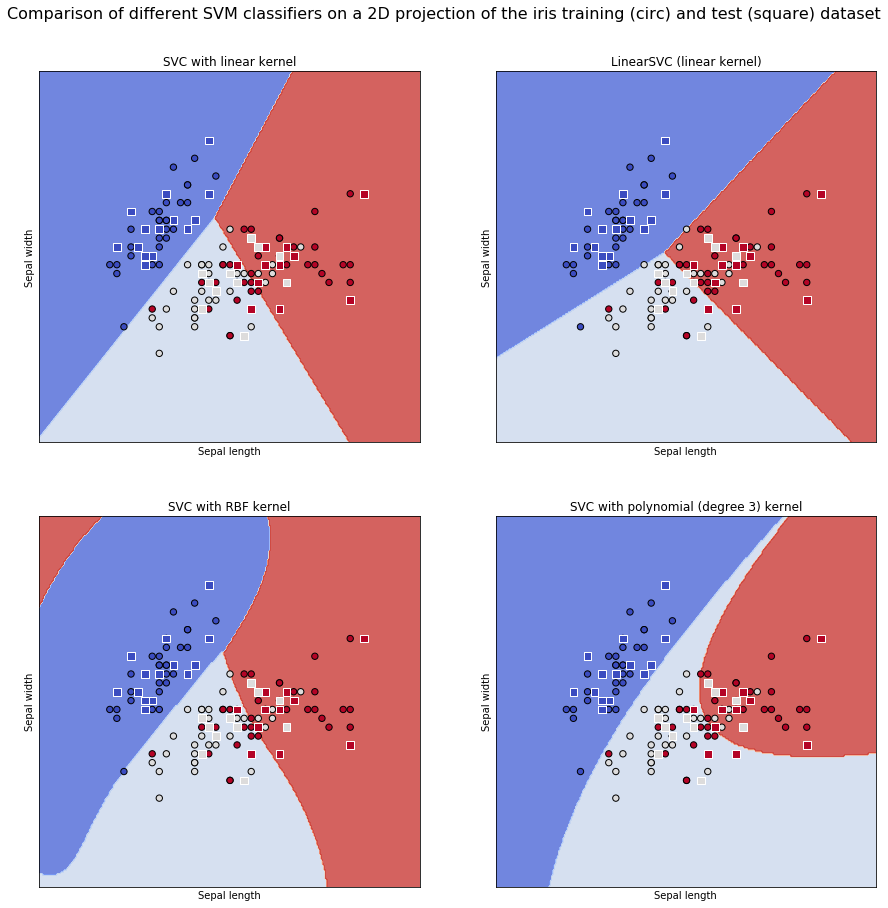

In [40]:
# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
fig.set_figheight(15)
fig.set_figwidth(15)


X0, X1 = X2_train[:, 0], X2_train[:, 1]
XX0, XX1 = X2_test[:, 0], X2_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models_fit, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y2_train, cmap=plt.cm.coolwarm, s=40, edgecolors='k')
    ax.scatter(XX0, XX1, c=y2_test, cmap=plt.cm.coolwarm, s=60, edgecolors='w', marker='s')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.suptitle('Comparison of different SVM classifiers on a 2D projection of the iris training (circ) and test (square) dataset', y=0.94, size=16 )
plt.show()

In [41]:
i=0
for clf in models:
    print(titles[i])
    clf.fit(X2_train, y2_train)
    print('  Accuracy of SVN classifier on training set: {:.2f}'
     .format(clf.score(X2_train, y2_train)))
    print('  Accuracy of SVN classifier on test set: {:.2f}'
     .format(clf.score(X2_test, y2_test)))
    pred = clf.predict(X2_test)
    print('  True:', y2_test)
    print('  Pred:', pred)   
    print('  Confusion matrix:\n', confusion_matrix(y2_test, pred))
    print('  Classification report:\n', 
          classification_report(y2_test, pred, target_names=iris_dataset['target_names']))
    i=i+1

SVC with linear kernel
  Accuracy of SVN classifier on training set: 0.79
  Accuracy of SVN classifier on test set: 0.84
  True: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
  Pred: [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 0 2 0 0 1 2
 0]
  Confusion matrix:
 [[15  0  0]
 [ 0  7  4]
 [ 0  2 10]]
  Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.64      0.70        11
   virginica       0.71      0.83      0.77        12

   micro avg       0.84      0.84      0.84        38
   macro avg       0.83      0.82      0.82        38
weighted avg       0.85      0.84      0.84        38

LinearSVC (linear kernel)
  Accuracy of SVN classifier on training set: 0.79
  Accuracy of SVN classifier on test set: 0.84
  True: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
  Pred: [1 0 2 2 2 0 1 2 1 1 

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 1.00


**For many machine learning algorithms, it is important to scale the data. Let's do that now using sklearn.**

In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

   micro avg       1.00      1.00      1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

